In [97]:
%load_ext autoreload
%autoreload 2

import cv2
from pathlib import Path
import numpy as np
import sys
sys.path.append('..')
from robustpca.general import ROOT_DIR

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [98]:
yale_data_dir  = Path(ROOT_DIR, 'data', 'CroppedYale')
assert yale_data_dir.exists()

$sgn(X)max(|X| - \lambda (CC^{\top})^{-1}) , X = (Y - P)C^T(CC^T)^{-1}$

In [99]:
human_id = 1

faces = []
for face_path in sorted(list(yale_data_dir.glob('*')))[human_id].glob('*.pgm'):
    arr = cv2.imread(face_path.as_posix())[:, :, 0]
    faces.append(arr)

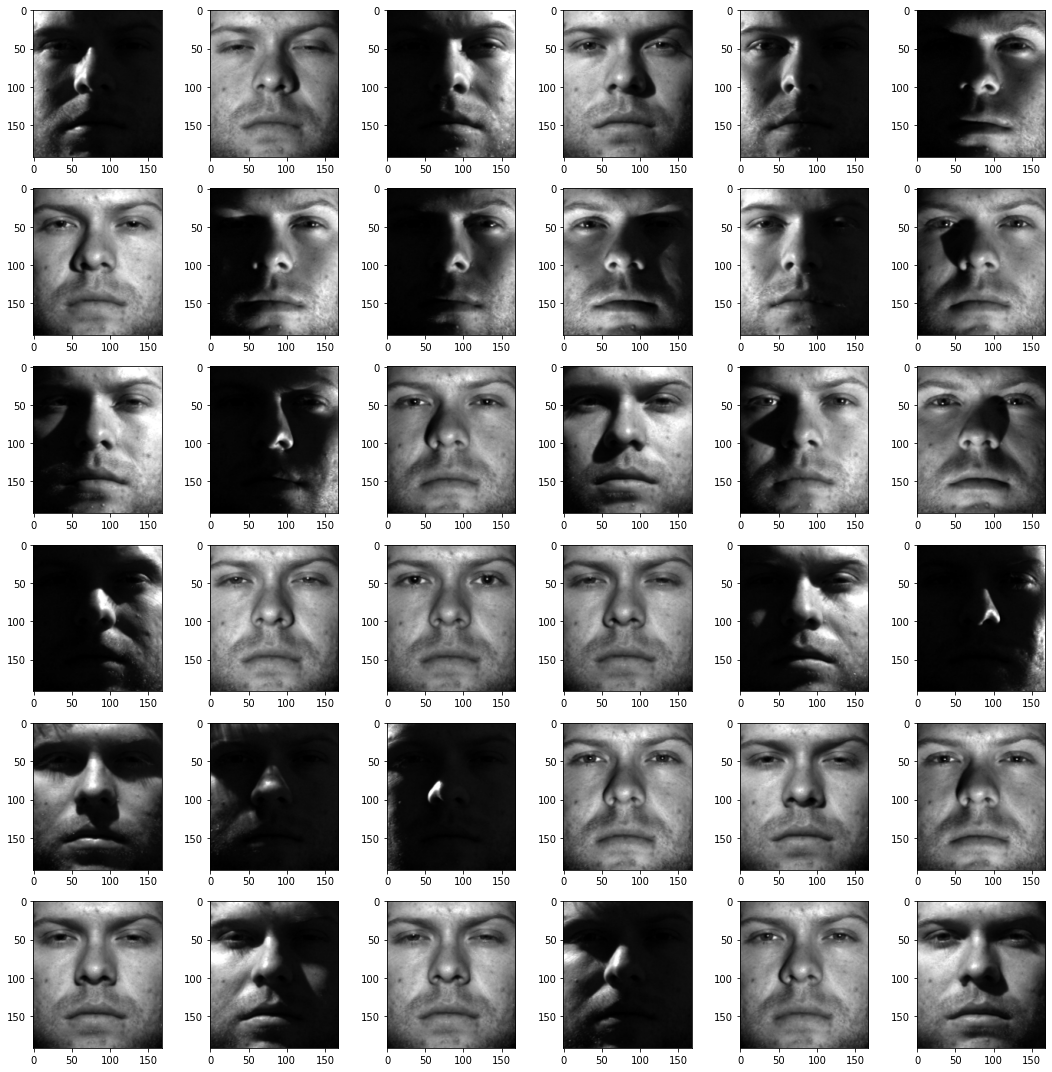

In [100]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(6, 6, figsize=(15, 15))

for i, ax in enumerate(axs.flatten()):
    ax.imshow(faces[i], cmap='gray')

fig.tight_layout()

In [101]:
data_mat = np.stack(faces, -1).reshape(-1, len(faces))
# data_mat = data_mat.T
data_mat.shape

(32256, 65)

In [102]:
np.random.seed(0)
n, d = data_mat.shape
m = 30
C = np.random.normal(0, 1 / 3, (d, m))
C = np.abs(C)
Y = data_mat @ C
print(C)

[[0.58801745 0.13338574 0.32624599 ... 0.06239462 0.5109264  0.48978626]
 [0.05164914 0.12605417 0.29592858 ... 0.10082397 0.2114407  0.12091372]
 [0.22415348 0.11985105 0.27104876 ... 0.05997495 0.35691754 0.35148391]
 ...
 [0.24695557 0.20276372 0.21357524 ... 0.46618736 0.13263737 0.26085963]
 [0.57440942 0.5991798  0.11895718 ... 0.70796334 0.15319497 0.09335262]
 [0.46351132 0.5471162  0.0516786  ... 0.73276545 0.33022364 0.33422286]]


In [103]:
from robustpca.pcp import CompressedPCP

In [ ]:
comppcp_iterative = CompressedPCP()
mu = comppcp_iterative.default_mu(Y)
P, S = comppcp_iterative.decompose(Y, C, mu, d, tol=1e-5, verbose=True)

it=0
S=array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
P=array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
it=1
S=array([[-1.33294106e+11, -2.97044009e+12, -2.29142572e+12, ...,
         0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
       [-1.33294106e+11, -2.97044009e+12, -2.29142572e+12, ...,
         0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
       [-1.33294106e+11, -2.97044009e+12,  2.29142572e+12, ...,
         0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.33294106e+11,  2.97044009e+12,  2.29142572e+12, ...,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e

it=7
S=array([[ 1.17277300e+17, -6.70659451e+17, -3.25470428e+17, ...,
        -1.91322288e+17,  1.83375777e+17,  7.87702777e+17],
       [-3.79441212e+17, -8.19053627e+17, -1.18861492e+17, ...,
         2.40051149e+17, -2.18545056e+17,  8.68316096e+16],
       [ 4.20762227e+16,  4.39509367e+17,  1.06493216e+17, ...,
        -3.89985388e+16,  2.71085832e+16, -1.39706829e+17],
       ...,
       [-9.49817984e+17,  1.30688059e+19,  1.68955736e+18, ...,
         8.73004739e+17, -2.37125244e+17,  1.22537410e+18],
       [ 1.72721724e+17,  1.44276154e+18,  6.86351759e+17, ...,
         1.71518065e+16,  4.03391281e+16, -4.73195627e+17],
       [ 2.33658451e+17,  1.50428349e+18,  2.07066543e+17, ...,
        -2.95723700e+17,  2.31879621e+17,  1.73367830e+17]])
P=array([[ 5.40758342e+16, -1.86473062e+17,  1.50827906e+17, ...,
        -2.21815774e+17,  7.91443648e+16, -6.91710293e+16],
       [ 9.02784783e+16,  6.68963843e+15, -4.40507055e+16, ...,
        -2.34001172e+17,  9.64187745e+16, -1.2

it=13
S=array([[ 2.78160521e+22, -3.39464848e+23, -1.80457448e+23, ...,
        -3.75097897e+22,  1.23730935e+22,  1.91734107e+23],
       [ 8.16938804e+21,  5.35086835e+22,  2.29820032e+22, ...,
        -1.20366171e+22,  6.72105033e+21,  6.19043949e+21],
       [ 1.13049382e+22,  3.81790669e+22,  1.29101626e+22, ...,
        -7.05516735e+21,  4.23432749e+21,  7.30924379e+20],
       ...,
       [ 7.04029834e+22, -4.48333357e+23, -1.71637218e+23, ...,
         7.53338817e+22, -1.10020748e+23,  5.38561564e+23],
       [-3.83395049e+21, -4.45988889e+22, -4.12939404e+22, ...,
        -8.17541959e+21,  3.53206488e+21,  5.30287778e+21],
       [ 4.60786277e+22, -2.14097021e+23, -8.80867852e+22, ...,
         8.71185895e+21,  2.30114610e+22,  7.12017424e+22]])
P=array([[-4.63014569e+21,  9.28495725e+21,  1.28032914e+22, ...,
        -1.56842231e+22, -1.71586937e+22,  1.39387747e+22],
       [-2.24360158e+21,  2.72304213e+21, -6.81606531e+20, ...,
        -1.81008353e+21, -2.66746421e+20, -8.

it=19
S=array([[ 1.50279944e+27,  6.48530196e+27, -8.42665454e+26, ...,
        -7.00540632e+26,  2.30407079e+26, -1.75896246e+27],
       [-1.23976402e+28, -9.43737041e+27,  8.03148246e+27, ...,
         1.66344177e+28, -6.87931386e+27, -2.56971275e+28],
       [ 3.65791363e+26,  2.92602661e+27,  1.05614609e+27, ...,
        -4.30224837e+26,  1.41622786e+26, -6.16218757e+26],
       ...,
       [ 5.65539045e+28, -7.24221118e+28,  1.34767349e+29, ...,
        -1.64008210e+28, -6.41119004e+26, -7.59303391e+27],
       [-8.06652084e+26, -4.73569817e+27, -1.39525528e+27, ...,
         6.13337792e+26, -2.71126801e+26,  1.20570542e+27],
       [-1.39677885e+27,  1.15619977e+27,  7.38801651e+26, ...,
         7.59272210e+26, -7.22479337e+26, -9.15479666e+26]])
P=array([[-5.27272885e+26,  3.09102024e+26,  4.20938335e+25, ...,
         1.32510408e+26, -7.34967845e+26, -2.13986829e+26],
       [-3.63904426e+27, -7.25836175e+27, -4.17778971e+27, ...,
        -4.43487263e+27,  1.69466484e+27, -5.

it=25
S=array([[ 1.19403288e+33,  1.28463555e+33, -1.38695612e+32, ...,
        -1.18001583e+33, -8.04532939e+31,  5.25964421e+33],
       [ 5.92429514e+32,  1.33145419e+33,  3.19017419e+32, ...,
        -2.33252671e+32, -6.53970867e+30,  1.24465636e+32],
       [-1.19606860e+31,  4.34231853e+33,  1.85589926e+33, ...,
        -3.23796447e+32,  1.27524619e+32,  2.66768731e+32],
       ...,
       [-1.80086500e+33,  7.31653639e+33,  9.99271752e+32, ...,
         1.13362874e+33, -1.02039274e+33, -2.97591421e+33],
       [ 3.14157834e+31,  1.71753912e+32,  4.58685283e+31, ...,
        -2.28497814e+31,  1.57084283e+31,  4.10017174e+31],
       [ 4.56286445e+30,  2.95898939e+31,  7.18277251e+30, ...,
        -3.60774107e+30,  7.79096266e+29, -1.38927152e+31]])
P=array([[ 3.81454243e+32,  1.41804545e+33,  6.11667771e+32, ...,
         4.18847262e+32,  1.19220695e+32,  1.78428831e+32],
       [-3.87806714e+31,  6.93709838e+31, -1.44931036e+31, ...,
         3.24980883e+31, -1.32284469e+32,  1.

it=31
S=array([[ 1.18732496e+38,  9.00341370e+38,  3.76915224e+38, ...,
        -9.95458732e+37,  6.52836313e+37, -2.78439320e+38],
       [ 7.92048807e+36, -8.20731048e+37, -2.85159495e+37, ...,
        -2.50512613e+36,  1.20908483e+37,  2.85739668e+37],
       [ 4.11891386e+36,  1.09562765e+38,  3.52468491e+37, ...,
        -1.18322730e+37,  1.36495447e+37,  2.57813817e+37],
       ...,
       [ 3.32350548e+38, -1.35839345e+39, -1.12197989e+39, ...,
        -4.35548161e+36,  5.60476461e+37,  1.05252313e+39],
       [ 1.80702719e+35, -1.48235102e+35,  6.47292574e+36, ...,
        -2.28702839e+36,  9.51032729e+35,  2.03469534e+36],
       [ 2.89171950e+35,  4.91839469e+35,  6.44186625e+35, ...,
        -8.62917850e+33,  8.91484306e+34,  6.17961877e+34]])
P=array([[ 6.32324231e+36,  8.00160863e+37, -3.84880222e+37, ...,
         8.37214801e+36,  2.77138084e+37, -1.43773145e+35],
       [ 5.32741267e+36,  1.11609055e+37,  1.40299125e+37, ...,
        -7.73240745e+36, -1.85350368e+35,  7.

it=37
S=array([[ 2.40391588e+42, -5.89368179e+43, -2.32309542e+43, ...,
         8.04668898e+42, -2.18816622e+42,  5.93416518e+42],
       [-8.29114483e+42, -5.62137326e+43, -2.40516366e+43, ...,
         3.83528840e+42, -1.08473193e+42,  2.10838357e+43],
       [-1.37965550e+42,  7.14480631e+41, -2.52125041e+42, ...,
         1.53193284e+42, -1.13391556e+42,  1.34462296e+42],
       ...,
       [ 1.26325736e+44,  1.82969479e+45,  5.27441600e+44, ...,
        -2.43222557e+44,  4.59410764e+43, -1.26886303e+44],
       [ 1.48236138e+41,  1.80328033e+42,  6.46068679e+41, ...,
        -1.47558540e+41,  2.46317178e+40, -6.47603838e+41],
       [ 2.22646606e+39, -6.82961422e+40, -1.66466431e+41, ...,
        -2.85967140e+40, -2.89822994e+39,  1.52750556e+41]])
P=array([[-1.02888905e+42,  4.24601190e+42,  1.26696490e+42, ...,
         3.37711946e+40,  6.97437168e+42, -2.13959758e+42],
       [ 1.12005412e+42,  7.25630079e+41,  9.06156033e+41, ...,
         2.03916334e+42,  2.32314784e+42,  8.

it=43
S=array([[ 2.54659064e+48,  1.63706208e+49,  1.46630252e+49, ...,
        -2.61172769e+48, -2.20198339e+47, -8.22141713e+48],
       [-4.87021030e+48, -2.16479077e+49, -8.99839663e+48, ...,
         6.04374336e+47, -3.14600733e+48, -7.31625755e+48],
       [-3.81825842e+48, -2.37328749e+49, -9.41099477e+48, ...,
         1.41398793e+48, -6.50066336e+47,  5.76518353e+48],
       ...,
       [ 5.83640166e+49,  1.71240064e+50,  9.41911044e+49, ...,
        -3.66192542e+49,  3.09914680e+49, -2.12817696e+49],
       [ 2.66409074e+45,  1.69428421e+46,  1.29458563e+45, ...,
        -2.21704323e+45,  1.21476592e+45,  6.99004787e+45],
       [-1.41778782e+46, -1.86649516e+47, -4.77938534e+46, ...,
         2.57574409e+46, -7.66835524e+45,  3.08717056e+46]])
P=array([[-2.06790810e+47,  2.41553961e+48, -6.20957908e+47, ...,
         2.36948309e+47,  2.59684052e+47,  8.59389295e+47],
       [ 9.37776819e+47, -1.38202389e+48, -7.11877938e+47, ...,
         6.15580540e+47, -4.35956903e+47,  1.

it=49
S=array([[ 4.90631540e+54,  1.73344942e+55,  2.80102744e+54, ...,
        -3.25130994e+54,  7.73478474e+53, -1.75250333e+54],
       [-7.47536992e+53, -1.08287836e+55, -1.64767600e+54, ...,
        -1.49973113e+53, -3.81638231e+53,  2.43590527e+54],
       [-1.27419050e+54,  2.16402008e+54,  1.22180174e+53, ...,
        -5.57823079e+53, -8.40190478e+53, -5.69278869e+53],
       ...,
       [ 4.50266397e+52,  5.48721509e+54,  1.41101793e+54, ...,
        -1.11139456e+54,  4.64257206e+53,  1.87564297e+54],
       [ 8.18292825e+51, -2.46921430e+52,  6.82249235e+51, ...,
        -2.41692158e+51,  3.79326906e+51,  7.41182668e+51],
       [ 8.99416927e+50,  1.81796580e+51,  3.16230989e+50, ...,
        -7.01047893e+50,  3.86076100e+50,  6.94163009e+50]])
P=array([[-3.07576537e+53, -3.44260388e+53, -3.53543478e+53, ...,
        -3.20429444e+53, -8.34378418e+53, -2.49569926e+53],
       [ 2.24867763e+53,  1.16057119e+54, -1.40901739e+52, ...,
         3.34238541e+53,  2.58299893e+53,  3.

it=55
S=array([[-1.79690433e+58, -3.98194620e+59,  2.58758012e+59, ...,
         1.25284371e+58,  9.98781115e+58, -1.91889717e+59],
       [-1.63792572e+60, -7.95460799e+58,  7.38715265e+59, ...,
         5.78125135e+59, -2.15989536e+60,  1.57354541e+60],
       [-3.80538905e+58, -1.18270602e+59,  3.93791254e+58, ...,
        -7.08192922e+57, -3.01287528e+58, -1.78905965e+58],
       ...,
       [ 6.33242846e+58,  8.36868191e+58,  2.76151266e+58, ...,
        -4.19423144e+57, -1.84876688e+58, -9.87388954e+58],
       [ 2.38638598e+57,  8.22671846e+57,  1.26611293e+57, ...,
        -2.05335869e+57,  1.76499237e+57, -7.40794550e+56],
       [ 1.94297033e+52,  2.29493240e+55,  1.19510709e+55, ...,
         6.21155211e+53, -1.62573939e+54, -1.24718549e+55]])
P=array([[-9.32793838e+58, -1.99700884e+59, -1.10862806e+59, ...,
        -1.53354506e+58, -5.84531129e+58, -1.07197844e+59],
       [-8.37677123e+57, -1.10083582e+60,  9.75593348e+58, ...,
        -9.80918480e+59, -8.00486940e+59, -4.

it=61
S=array([[-3.30278912e+64, -1.34161239e+65, -6.13839813e+64, ...,
         3.40297264e+64, -4.24687439e+63,  1.02432842e+65],
       [ 3.45564557e+65,  5.12534340e+65,  3.33414749e+65, ...,
        -1.52459353e+65,  2.84069234e+65, -3.02847673e+65],
       [ 4.04764835e+64,  5.09468806e+64,  8.37899885e+63, ...,
        -1.53253107e+64,  7.72470836e+62,  4.05271317e+64],
       ...,
       [ 1.70139208e+63,  1.58577172e+64,  5.53424537e+63, ...,
        -2.19015886e+63,  9.16770703e+62, -8.72812313e+62],
       [ 4.15060088e+62, -1.03426032e+64, -2.16947977e+63, ...,
         4.35522111e+62, -1.89099170e+62,  4.39309045e+63],
       [ 1.83806441e+59, -8.99976440e+59, -5.50215840e+59, ...,
        -1.17359253e+59,  3.27703797e+59,  7.25205533e+59]])
P=array([[ 1.61013130e+63, -5.18689595e+62,  6.43417145e+63, ...,
         2.34939473e+63,  7.93639266e+63,  1.95003634e+63],
       [ 1.19750085e+65,  3.24043444e+65,  1.29717004e+65, ...,
         2.51005371e+64, -7.53048486e+64,  9.

it=67
S=array([[-4.37033857e+66,  3.29674852e+68,  1.72136512e+68, ...,
        -8.29695203e+66, -2.01393855e+67, -1.33798825e+68],
       [ 3.14484779e+70,  3.07344313e+71, -6.14271801e+69, ...,
        -3.13928847e+70, -1.28992455e+70, -3.14848555e+71],
       [-9.00250582e+69, -9.00628999e+70, -3.98506293e+70, ...,
         1.23505812e+70, -1.70839702e+69,  1.04443494e+70],
       ...,
       [-1.13649901e+68,  1.09836347e+69,  1.38009043e+68, ...,
         1.11726226e+68, -1.42607816e+68,  1.35163433e+69],
       [-1.11939230e+68,  1.45385560e+69, -2.42885723e+68, ...,
         8.01346599e+67, -4.59338101e+68,  3.16438125e+68],
       [-1.93870443e+64, -5.76732678e+64, -9.40698534e+64, ...,
        -6.25528907e+63, -9.41149616e+63,  2.82191047e+64]])
P=array([[-1.93558625e+65,  2.41212473e+67, -2.34407228e+67, ...,
         2.91746662e+67,  2.78170887e+67, -8.23543730e+66],
       [-1.97506800e+70, -9.00358947e+70, -3.95983229e+70, ...,
        -2.48620323e+70, -1.71805884e+68, -1.

it=73
S=array([[ 1.38297530e+70,  1.95944178e+72,  1.52356436e+72, ...,
        -3.85047299e+71, -1.26084888e+71, -1.02238234e+72],
       [ 8.15359710e+76,  6.44489718e+77,  7.64069846e+75, ...,
        -7.02475760e+76,  4.44066459e+76, -1.19395508e+77],
       [-6.74008284e+73, -7.33148323e+74, -3.32532074e+74, ...,
         7.59927876e+73, -2.57443222e+73,  2.17847965e+74],
       ...,
       [ 9.87645428e+71, -4.15652955e+72,  1.91866528e+73, ...,
         3.19067005e+71, -8.76675029e+71, -1.62204306e+73],
       [-5.60395059e+73, -5.97843192e+74, -2.87349742e+74, ...,
         1.08880064e+74, -3.90414740e+73,  2.07166943e+74],
       [ 2.52062662e+69,  6.79472736e+69,  3.32776094e+69, ...,
        -2.62535018e+69,  9.99491857e+68,  3.27190376e+68]])
P=array([[ 8.37758150e+70,  3.19935610e+70, -2.72692302e+70, ...,
        -4.94331038e+70,  2.27147069e+71,  6.41691551e+70],
       [-6.74601667e+75, -3.99160615e+75, -1.39939186e+76, ...,
         2.24158429e+75, -2.25175034e+76, -2.

it=79
S=array([[-1.59408888e+76, -8.29783218e+76, -2.37082509e+76, ...,
         1.37793342e+76, -6.76000418e+75,  4.63828876e+75],
       [ 9.86919179e+81, -1.31789464e+83, -5.83388936e+82, ...,
        -6.83099199e+81,  6.63399802e+80,  2.19374199e+82],
       [ 1.85906027e+78,  6.33283993e+78,  4.00534569e+78, ...,
        -2.06187425e+78,  1.85665794e+78, -1.22119888e+78],
       ...,
       [-3.07782915e+76, -1.04796196e+77, -5.55611877e+76, ...,
         2.08671036e+76, -9.72875961e+75,  3.17251908e+76],
       [ 5.91277445e+78,  2.14865517e+79,  1.01406958e+79, ...,
        -2.96880911e+78,  1.42862384e+78, -1.45675066e+78],
       [-5.03126097e+72,  9.22195592e+74,  4.39331727e+74, ...,
         4.44885215e+73, -9.26150136e+73,  1.12788052e+74]])
P=array([[-1.17466598e+75, -2.18908858e+75, -4.69468816e+75, ...,
        -5.93407017e+75,  6.37984392e+75, -2.50882190e+75],
       [ 4.95524691e+81,  7.85893351e+81,  4.83797916e+81, ...,
         2.63383435e+81,  1.67862608e+81,  5.

it=85
S=array([[-8.52322397e+80,  2.26543046e+80, -2.34447521e+80, ...,
        -2.89878481e+80, -7.88906443e+80, -7.37447814e+80],
       [ 4.70438764e+86, -1.29618699e+87, -1.33703618e+88, ...,
         3.37261521e+87,  5.63016837e+86,  1.45021221e+88],
       [-7.45621067e+84, -4.24647541e+85,  5.91146866e+83, ...,
         4.46412321e+84, -3.59180352e+84,  1.43710249e+84],
       ...,
       [-1.85534154e+81,  3.63269444e+82,  1.37355329e+82, ...,
        -3.72468765e+80, -4.06695726e+81, -2.75049614e+82],
       [-2.11727255e+81, -9.80328977e+82, -1.03733147e+83, ...,
        -7.95654074e+81, -7.80196868e+81, -2.85884641e+82],
       [ 2.52881825e+80,  1.50587790e+81,  2.78047228e+80, ...,
        -1.72697528e+80,  1.22724654e+80,  2.69898976e+80]])
P=array([[ 5.26732225e+80,  1.06138930e+81,  3.23936237e+80, ...,
         5.47408999e+80,  3.34002580e+80,  3.92763679e+80],
       [ 9.87544909e+86,  7.67540410e+86,  1.13177876e+87, ...,
        -2.86645530e+86, -2.11636804e+85,  1.

it=91
S=array([[-9.20319255e+85,  1.77715111e+86,  1.64120694e+86, ...,
         1.65120095e+86, -1.10619388e+86, -8.87645343e+85],
       [-6.50715834e+93, -3.91071443e+94, -2.23861352e+94, ...,
         3.82436673e+93, -1.21779831e+93,  1.16489870e+94],
       [ 1.30046997e+88, -3.93809628e+89, -1.00690506e+90, ...,
         7.65746644e+88,  1.29986867e+88,  1.08649064e+89],
       ...,
       [-1.29491287e+85,  2.16256857e+86,  2.08417385e+86, ...,
        -1.40378450e+86,  7.35453205e+85, -1.62706204e+86],
       [ 1.91719317e+88,  4.54675747e+89,  1.91057836e+89, ...,
        -5.57469496e+88,  8.85105931e+87, -1.88359523e+89],
       [ 2.37847856e+85,  2.07023070e+86,  1.58831977e+85, ...,
        -1.14322825e+85,  1.34281156e+85, -1.52483840e+86]])
P=array([[ 8.75590278e+83, -5.12016731e+85, -3.02283685e+85, ...,
        -3.54911393e+85, -1.95256958e+85, -5.58088576e+85],
       [ 1.42664443e+93, -3.17309370e+93,  1.15559886e+93, ...,
         1.90065517e+93,  4.50701201e+93, -9.